In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [9]:
lvl = data.iloc[:,1:2].values
sal = data.iloc[:,2].values
lvl,sal

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

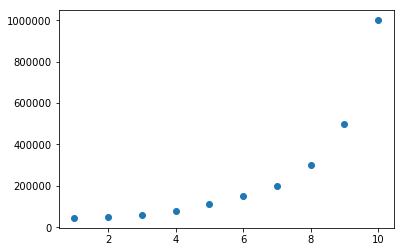

In [10]:
plt.scatter(lvl,sal)
plt.show()

In [14]:
mymodel = LinearRegression()
mymodel.fit(lvl,sal)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

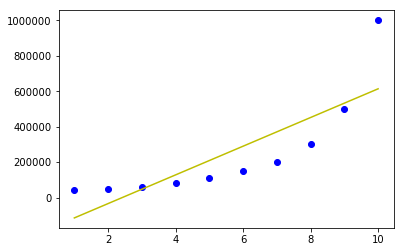

In [15]:
plt.scatter(lvl,sal,color='b')
plt.plot(lvl,mymodel.predict(lvl),color='y')
plt.show()

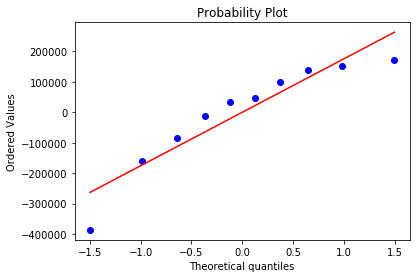

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=5.6611020132761363, pvalue=0.058980346152096026)

In [18]:
res = mymodel.predict(lvl)-sal
st.probplot(res,plot=plt)
plt.show()
st.normaltest(res)

In [35]:
X_poly = PolynomialFeatures(degree=4)
X_fet = X_poly.fit_transform(lvl)
X_fet

array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          8.00000000e+00,   1.60000000e+01],
       [  1.00000000e+00,   3.00000000e+00,   9.00000000e+00,
          2.70000000e+01,   8.10000000e+01],
       [  1.00000000e+00,   4.00000000e+00,   1.60000000e+01,
          6.40000000e+01,   2.56000000e+02],
       [  1.00000000e+00,   5.00000000e+00,   2.50000000e+01,
          1.25000000e+02,   6.25000000e+02],
       [  1.00000000e+00,   6.00000000e+00,   3.60000000e+01,
          2.16000000e+02,   1.29600000e+03],
       [  1.00000000e+00,   7.00000000e+00,   4.90000000e+01,
          3.43000000e+02,   2.40100000e+03],
       [  1.00000000e+00,   8.00000000e+00,   6.40000000e+01,
          5.12000000e+02,   4.09600000e+03],
       [  1.00000000e+00,   9.00000000e+00,   8.10000000e+01,
          7.29000000e+02,   6.56100000e+03],
       [  1.00000000e+00,   1.0000000

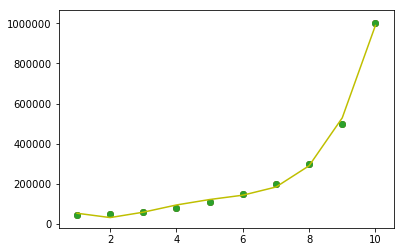

In [37]:
mymodel = LinearRegression()
mymodel.fit(X_fet, sal)
plt.scatter(lvl,sal)
plt.plot(lvl,mymodel.predict(X_fet),color='y')
plt.show()

In [40]:
mymodel.predict(X_poly.transform(3.8))


array([ 87878.03263406])